In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
dtypes = {
    'geo_id' : str, # A lot of these have leading zeros
    'state' : str,
    'county' : str,
    'tract' : str,
}
census_df = pd.read_csv('../data/census_geoid.csv', dtype=dtypes)

In [3]:
list(census_df.columns)

['geo_id',
 'Total:_x',
 'Male:',
 'Male:!!Under 5 years',
 'Male:!!5 to 9 years',
 'Male:!!10 to 14 years',
 'Male:!!15 to 17 years',
 'Male:!!18 and 19 years',
 'Male:!!20 years',
 'Male:!!21 years',
 'Male:!!22 to 24 years',
 'Male:!!25 to 29 years',
 'Male:!!30 to 34 years',
 'Male:!!35 to 39 years',
 'Male:!!40 to 44 years',
 'Male:!!45 to 49 years',
 'Male:!!50 to 54 years',
 'Male:!!55 to 59 years',
 'Male:!!60 and 61 years',
 'Male:!!62 to 64 years',
 'Male:!!65 and 66 years',
 'Male:!!67 to 69 years',
 'Male:!!70 to 74 years',
 'Male:!!75 to 79 years',
 'Male:!!80 to 84 years',
 'Male:!!85 years and over',
 'Female:',
 'Female:!!Under 5 years',
 'Female:!!5 to 9 years',
 'Female:!!10 to 14 years',
 'Female:!!15 to 17 years',
 'Female:!!18 and 19 years',
 'Female:!!20 years',
 'Female:!!21 years',
 'Female:!!22 to 24 years',
 'Female:!!25 to 29 years',
 'Female:!!30 to 34 years',
 'Female:!!35 to 39 years',
 'Female:!!40 to 44 years',
 'Female:!!45 to 49 years',
 'Female:!!50 t

In [4]:
cols = [
    'geo_id',
    'Total Population',
    'Male Population',
    'Male Under 5 years Population',
    'Male 5 to 9 years Population',
    'Male 10 to 14 years Population',
    'Male 15 to 17 years Population',
    'Male 18 and 19 years Population',
    'Male 20 years Population',
    'Male 21 years Population',
    'Male 22 to 24 years Population',
    'Male 25 to 29 years Population',
    'Male 30 to 34 years Population',
    'Male 35 to 39 years Population',
    'Male 40 to 44 years Population',
    'Male 45 to 49 years Population',
    'Male 50 to 54 years Population',
    'Male 55 to 59 years Population',
    'Male 60 and 61 years Population',
    'Male 62 to 64 years Population',
    'Male 65 and 66 years Population',
    'Male 67 to 69 years Population',
    'Male 70 to 74 years Population',
    'Male 75 to 79 years Population',
    'Male 80 to 84 years Population',
    'Male 85 years and over Population',
    'Female Population',
    'Female Under 5 years Population',
    'Female 5 to 9 years Population',
    'Female 10 to 14 years Population',
    'Female 15 to 17 years Population',
    'Female 18 and 19 years Population',
    'Female 20 years Population',
    'Female 21 years Population',
    'Female 22 to 24 years Population',
    'Female 25 to 29 years Population',
    'Female 30 to 34 years Population',
    'Female 35 to 39 years Population',
    'Female 40 to 44 years Population',
    'Female 45 to 49 years Population',
    'Female 50 to 54 years Population',
    'Female 55 to 59 years Population',
    'Female 60 and 61 years Population',
    'Female 62 to 64 years Population',
    'Female 65 and 66 years Population',
    'Female 67 to 69 years Population',
    'Female 70 to 74 years Population',
    'Female 75 to 79 years Population',
    'Female 80 to 84 years Population',
    'Female 85 years and over Population',
    'state',
    'county',
    'tract',
    'Households Less than $10,000 income in last 12 months',
    'Households $10,000 to $14,999 income in last 12 months',
    'Households $15,000 to $19,999 income in last 12 months',
    'Households $20,000 to $24,999 income in last 12 months',
    'Households $25,000 to $29,999 income in last 12 months',
    'Households $30,000 to $34,999 income in last 12 months',
    'Households $35,000 to $39,999 income in last 12 months',
    'Households $40,000 to $44,999 income in last 12 months',
    'Households $45,000 to $49,999 income in last 12 months',
    'Households $50,000 to $59,999 income in last 12 months',
    'Households $60,000 to $74,999 income in last 12 months',
    'Households $75,000 to $99,999 income in last 12 months',
    'Households $100,000 to $124,999 income in last 12 months',
    'Households $125,000 to $149,999 income in last 12 months',
    'Households $150,000 to $199,999 income in last 12 months',
    'Households $200,000 or more income in last 12 months',
    'Total Households',
    'Family Households',
    'Family households - Married-couple family',
    'Family households - Married-couple family - 1-unit structures',
    'Family households - Married-couple family - 2-or-more-unit structures',
    'Family households - Married-couple family - Mobile homes and all other types of units',
    'Family households - Other family:',
    'Family households - Other family - Male householder, no wife present:',
    'Family households - Other family - Male householder, no wife present - 1-unit structures',
    'Family households - Other family - Male householder, no wife present - 2-or-more-unit structures',
    'Family households - Other family - Male householder, no wife present - Mobile homes and all other types of units',
    'Family households - Other family - Female householder, no husband present:',
    'Family households - Other family - Female householder, no husband present - 1-unit structures',
    'Family households - Other family - Female householder, no husband present - 2-or-more-unit structures',
    'Family households - Other family - Female householder, no husband present - Mobile homes and all other types of units',
    'Nonfamily households',
    'Nonfamily households - 1-unit structures',
    'Nonfamily households - 2-or-more-unit structures',
    'Nonfamily households - Mobile homes and all other types of units',
    'Owner-occupied households',
    'Renter-occupied households',
    'Total population in Owner occupied households',
    'Total population in Owner occupied households 0-1 yr Tenure',
    'Total population in Owner occupied households 1-5 yr Tenure',
    'Total population in Owner occupied households 6-15 yr Tenure',
    'Total population in Owner occupied households 16-25 yr Tenure',
    'Total population in Owner occupied households 26-35 yr Tenure',
    'Total population in Owner occupied households 36+ yr Tenure',
    'Total population in Renter occupied households',
    'Total population in Renter occupied households 0-1 yr Tenure',
    'Total population in Renter occupied households 1-5 yr Tenure',
    'Total population in Renter occupied households 6-15 yr Tenure',
    'Total population in Renter occupied households 16-25 yr Tenure',
    'Total population in Renter occupied households 26-35 yr Tenure',
    'Total population in Renter occupied households 36+ yr Tenure',
    'Male Marital Status Never married',
    'Male Marital Status Now married',
    'Male Marital Status Widowed',
    'Male Marital Status Divorced',
    'Female Marital Status Never married',
    'Female Marital Status Now married',
    'Female Marital Status Widowed',
    'Female Marital Status Divorced',
    'Education: No schooling completed',
    'Education: Nursery school',
    'Education: Kindergarten',
    'Education: 1st grade',
    'Education: 2nd grade',
    'Education: 3rd grade',
    'Education: 4th grade',
    'Education: 5th grade',
    'Education: 6th grade',
    'Education: 7th grade',
    'Education: 8th grade',
    'Education: 9th grade',
    'Education: 10th grade',
    'Education: 11th grade',
    'Education: 12th grade, no diploma',
    'Education: Regular high school diploma',
    'Education: GED or alternative credential',
    'Education: Some college, less than 1 year',
    'Education: Some college, 1 or more years, no degree',
    "Education: Associate's degree",
    "Education: Bachelor's degree",
    "Education: Master's degree",
    'Education: Professional school degree',
    'Education: Doctorate degree'
]

In [5]:
census_df.columns = cols

<IPython.core.display.Javascript object>


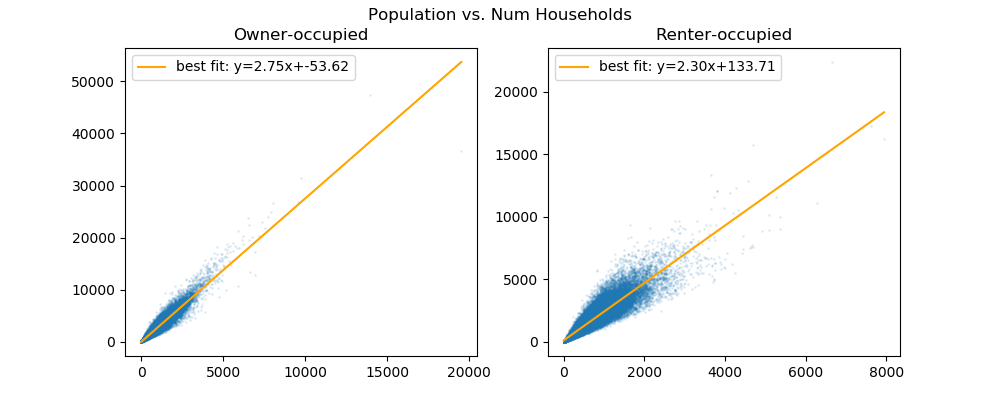

In [6]:
plt.figure(figsize=(10,4))
X = census_df['Owner-occupied households']
Y = census_df['Total population in Owner occupied households']
plt.subplot(1,2,1)
plt.scatter(X, Y, s=1, alpha=0.1, label=None)
m, b = np.polyfit(X, Y, 1)
plt.plot(np.unique(X), m*np.unique(X) + b, c='orange', label='best fit: y={0:2.2f}x+{1:2.2f}'.format(m, b))
plt.legend()
plt.title('Owner-occupied')
X = census_df['Renter-occupied households']
Y = census_df['Total population in Renter occupied households']
plt.subplot(1,2,2)
plt.scatter(X, Y, s=1, alpha=0.1, label=None)
m, b = np.polyfit(X, Y, 1)
plt.plot(np.unique(X), m*np.unique(X) + b, c='orange', label='best fit: y={0:2.2f}x+{1:2.2f}'.format(m, b))
plt.legend()
plt.title('Renter-occupied')
_=plt.suptitle('Population vs. Num Households')

In [7]:
census_df.shape[0] == census_df['geo_id'].unique().shape[0]

True

In [8]:
census_df.to_csv('../data/census_geoid.csv', index=False)